<a href="https://colab.research.google.com/github/pajjurigit/aiml/blob/main/lowcodeai/LowCodeAi_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
url='https://data.cdc.gov/api/views/i2vk-mgdh/rows.csv?accessType=DOWNLOAD'
heart_df = pd.read_csv(url, index_col=0)


Above code loads data into Panda's Data frame
Below code shows how to manipulate that data using Pandas


In [4]:
heart_df.head()


,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
Year,,,,,,,,,,,,,,,,,,
2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59076 entries, 2014 to 2014
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LocationAbbr                59076 non-null  object 
 1   LocationDesc                59076 non-null  object 
 2   GeographicLevel             59076 non-null  object 
 3   DataSource                  59076 non-null  object 
 4   Class                       59076 non-null  object 
 5   Topic                       59076 non-null  object 
 6   Data_Value                  32149 non-null  float64
 7   Data_Value_Unit             59076 non-null  object 
 8   Data_Value_Type             59076 non-null  object 
 9   Data_Value_Footnote_Symbol  26927 non-null  object 
 10  Data_Value_Footnote         26927 non-null  object 
 11  StratificationCategory1     59076 non-null  object 
 12  Stratification1             59076 non-null  object 
 13  StratificationCategory2     59076 

In [ ]:
heart_local = pd.read_csv('heart.csv', on_bad_lines='skip', engine='python')
#heart_local.head()
heart_local.info()

In [9]:
#heart_local.info()

heart_df.isnull().sum()

LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26927
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32149
Data_Value_Footnote           32149
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Location 1                       18
dtype: int64

In [16]:
heart_df.Stratification2.drop_duplicates()

Year
2014                               Overall
2014                                 White
2014                                 Black
2014                              Hispanic
2014            Asian and Pacific Islander
2014    American Indian and Alaskan Native
Name: Stratification2, dtype: object

In [21]:
import seaborn as sns
#import matplotlib.pyplot as plt

#
#plt.show()
heart_df.reset_index()
heart_df.Stratification2.duplicated()

heart_df = heart_df.loc[:,~heart_df.columns.duplicated()]

True
True
True
True


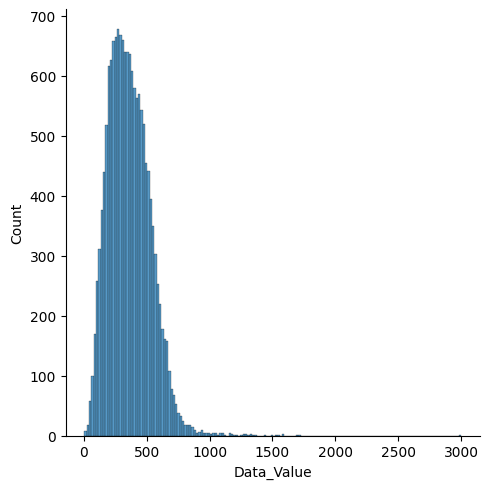

In [29]:
#sns.violinplot(x='Data_Value', y='Stratification2', data=heart_df)

print(heart_df['Data_Value'].duplicated().any())
print(heart_df['Stratification2'].duplicated().any())

heart_df_unique = heart_df.drop_duplicates(subset=['Data_Value', 'Stratification2'])

print(heart_df_unique['Data_Value'].duplicated().any())
print(heart_df_unique['Stratification2'].duplicated().any())

#sns.violinplot(x='Data_Value', y='Stratification2', data=heart_df_unique)
sns.displot(heart_df_unique['Data_Value'])
